# Assignment 5: Datasets


In this assignment, we'll work with a simple biological dataset containing information about hypothetical patients and their white blood cell (WBC) counts. We'll use Python and pandas to load, inspect, and analyze the data.


## <font color = "pink" >  Part 1: Load and Inspect the Dataset



**Task:**

- Load the dataset into Python.
- Display the first 5 rows of the dataset.
- Count the total number of patients in the dataset.

**Instructions:**

- Use `pd.read_csv('filename.csv')` to read the CSV file.
- Use the `.head()` method to display the first few rows.
- Use `len(data)` or `data.shape[0]` to count the number of rows.



In [25]:
import pandas as pd

# Load the dataset
data = pd.read_csv('patient_data.csv')
# TODO: Read 'patient_data.csv' into a pandas DataFrame called 'data'

# Display the first 5 rows of the dataset
print(data.head(5))
# TODO: Use a method to display the first 5 rows of 'data'

# Count the number of patients
print(len(data), "patients.")
# TODO: Use a function to get the number of rows in 'data' and print it


   PatientID  Age Sex  Condition  WBC_Count
0          1   25   M    Healthy       5600
1          2   40   F  Infection      11000
2          3   35   F    Healthy       6700
3          4   50   M     Cancer       8700
4          5   60   M  Infection      13400
10 patients.


## <font color = "pink" > Task 2: Summarize the data

**Task**

Calculate the average (mean) WBC count.
Find the minimum and maximum WBC count.
Determine the number of unique conditions in the dataset.
Instructions:

Use data['WBC_Count'].mean() to compute the mean WBC count.
Use .min() and .max() to find the minimum and maximum WBC counts.
Use data['Condition'].nunique() to find the number of unique conditions.



In [39]:
# Calculate basic statistics
# TODO: Compute the mean WBC count and store it in 'mean_wbc'
mean_wbc = sum(data["WBC_Count"])

# TODO: Compute the minimum WBC count and store it in 'min_wbc'
min_wbc = min(data["WBC_Count"])

# TODO: Compute the maximum WBC count and store it in 'max_wbc'
max_wbc = max(data["WBC_Count"])

print(f"\nMean WBC count: {mean_wbc}")
print(f"Minimum WBC count: {min_wbc}")
print(f"Maximum WBC count: {max_wbc}")

# Count unique conditions
unique_conditions = len(data["WBC_Count"].unique())
# TODO: Find the number of unique conditions and store it in 'unique_conditions'
print(f"\nNumber of unique conditions: {unique_conditions}")



Mean WBC count: 87100
Minimum WBC count: 5400
Maximum WBC count: 13400

Number of unique conditions: 10


## <font color = "pink" >Task 3: Filtering the data

**Task**

Extract patients with WBC count above 10,000.
Extract patients with the condition "Healthy".
Instructions:

Use boolean indexing to filter the DataFrame.
Store the filtered DataFrames in variables and display them.



In [59]:
# Filter patients with WBC count > 10,000
# TODO: Create a DataFrame 'high_wbc' containing patients with WBC_Count > 10000
high_wbc = data[data["WBC_Count"]>10000]
print("\nPatients with WBC count above 10,000:")
print(high_wbc)

# Filter patients with the condition 'Healthy'
# TODO: Create a DataFrame 'healthy_patients' containing patients with Condition == 'Healthy'
healthy_patients = data[data["Condition"]=="Healthy"]
print("\nPatients with the condition 'Healthy':")
print(healthy_patients)



Patients with WBC count above 10,000:
   PatientID  Age Sex  Condition  WBC_Count
1          2   40   F  Infection      11000
4          5   60   M  Infection      13400
7          8   45   F  Infection      12500

Patients with the condition 'Healthy':
   PatientID  Age Sex Condition  WBC_Count
0          1   25   M   Healthy       5600
2          3   35   F   Healthy       6700
5          6   30   F   Healthy       5900
8          9   20   F   Healthy       5400


## <font color = "pink" >Task 4: Counting the Data

In [111]:
# Count patients by condition
# TODO: Use a method to count the number of patients in each condition and store in 'condition_counts'

sort_data=data.sort_values(by="Condition")
counts=[0]
conditions=[]

for patient in sort_data["Condition"]:
    if patient in conditions:
        counts[-1]+=1
    else:
        if len(conditions)==0:
            counts[0]=1
            conditions.append(patient)
        else:
            counts.append(1)
            conditions.append(patient)
condition_counts=list(zip(conditions, counts))

print("\nNumber of patients by condition:")
print(condition_counts)



Number of patients by condition:
[('Cancer', 3), ('Healthy', 4), ('Infection', 3)]


## <font color ='pink'> # Task 5: Visualize Data

Task:

Create a bar chart showing the number of patients for each condition.
Create a scatter plot showing the relationship between age and WBC count.
Instructions:

Use matplotlib for plotting.
Customize the plots with titles and labels.






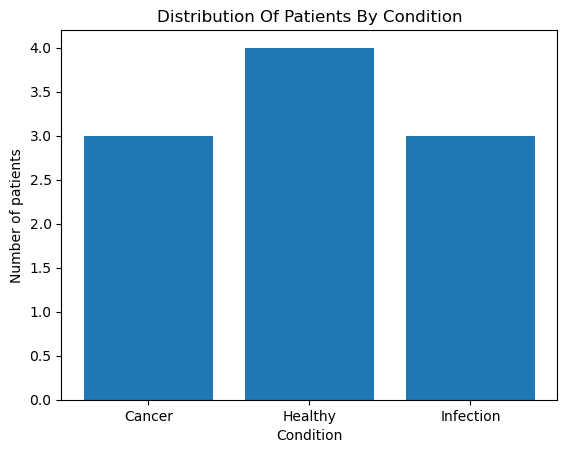

Text(0, 0.5, 'Number of patients')

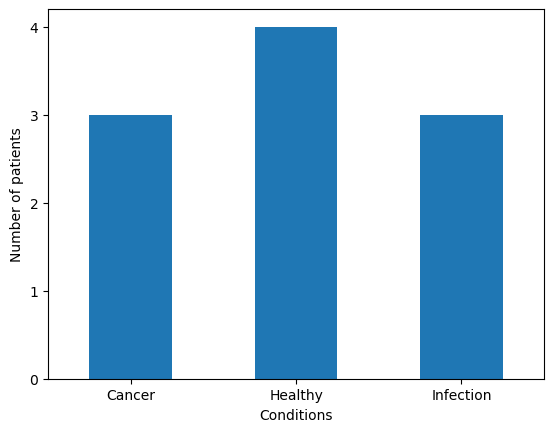

In [139]:
import matplotlib.pyplot as plt
import pandas as pd

# Bar chart for number of patients by condition
# TODO: Use 'condition_counts' to create a bar chart (you can use condition_counts.plot())

## matplotlib:

condition_counts=list(zip(conditions, counts))
plt.bar([item[0] for item in condition_counts], [item[1] for item in condition_counts])
plt.xlabel('Condition')
plt.ylabel('Number of patients')
plt.title('Distribution Of Patients By Condition')
plt.show()

## using condition_counts.plot() with pandas:

condition_counts=pd.DataFrame(condition_counts, columns=['Conditions', 'Number of patients'])

condition_counts.set_index('Conditions')['Number of patients'].plot(kind='bar')
plt.xticks(rotation=0)
plt.yticks(range(0, 5, 1))
plt.ylabel('Number of patients')


# Scatter plot of Age vs. WBC Count
# TODO: Create a scatter plot with 'Age' on the x-axis and 'WBC_Count' on the y-axis (you can use plt.scatter())
## Did it in the next cell.

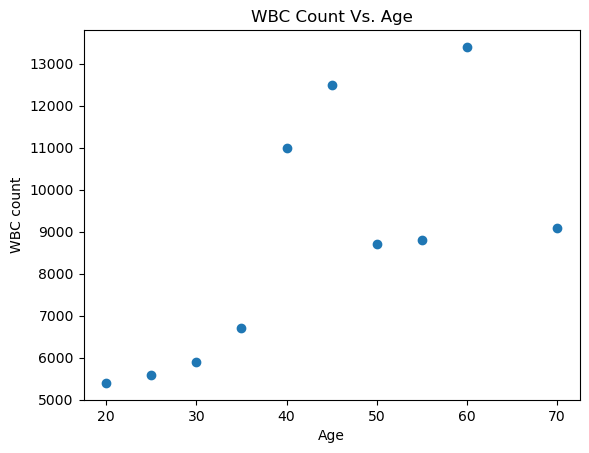

In [143]:
# Scatter plot of Age vs. WBC Count
# TODO: Create a scatter plot with 'Age' on the x-axis and 'WBC_Count' on the y-axis (you can use plt.scatter())

plt.scatter(data['Age'], data['WBC_Count'])
plt.xlabel('Age')
plt.ylabel('WBC count')
plt.title('WBC Count Vs. Age')
plt.show()